In [1]:
import sys

sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from stats_arb.tests import adf_test, kpss_test, cal_half_life, pp_test
from datetime import datetime, timedelta
from ta.volatility import BollingerBands

import matplotlib.pyplot as plt

DATA_PATH = '/mnt/d/Working/PersonalProjects/Trading/trading-agent/crypto-pair-trading/data/crypto/1h'
# DATA_PATH = '../data/crypto/1m'

In [3]:
# symbols = pd.read_csv(f'{DATA_PATH}/../symbols.csv')['symbol'].values.tolist()
symbols = ['BTCUSDT',
 'ETHUSDT',
 'BCHUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'LTCUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'LINKUSDT',
 'XLMUSDT',
 'ADAUSDT',
 'XMRUSDT',
 'DASHUSDT',
 'ZECUSDT',
 'XTZUSDT',
 'BNBUSDT',
 'ATOMUSDT',
 'ONTUSDT',
 'IOTAUSDT',
 'BATUSDT',
 'VETUSDT',
 'NEOUSDT',
 'QTUMUSDT',
 'IOSTUSDT',
 'THETAUSDT',
 'ALGOUSDT',
 'ZILUSDT',
 'KNCUSDT',
 'ZRXUSDT',
 'COMPUSDT',
 'OMGUSDT',
 'DOGEUSDT',
 'SXPUSDT',
 'KAVAUSDT',
 'BANDUSDT',
 'RLCUSDT',
 'WAVESUSDT',
 'MKRUSDT',
 'SNXUSDT',
 'DOTUSDT',
 'DEFIUSDT',
 'YFIUSDT',
 'BALUSDT',
 'CRVUSDT',
 'TRBUSDT',
 'RUNEUSDT',
 'SUSHIUSDT',
 'SRMUSDT',
 'EGLDUSDT',
 'SOLUSDT',
 'ICXUSDT',
 'STORJUSDT',
 'BLZUSDT',
 'UNIUSDT',
 'AVAXUSDT',
 'FTMUSDT',
 'HNTUSDT',
 'ENJUSDT',
 'FLMUSDT',
 'TOMOUSDT',
 'RENUSDT',
 'KSMUSDT',
 'NEARUSDT',
 'AAVEUSDT',
 'FILUSDT',
 'RSRUSDT',
 'LRCUSDT',
 'MATICUSDT',
 'OCEANUSDT',
 'CVCUSDT',
 'BELUSDT',
 'CTKUSDT',
 'AXSUSDT',
 'ALPHAUSDT',
 'ZENUSDT',
 'SKLUSDT',
 'GRTUSDT',
 '1INCHUSDT',
 'CHZUSDT',
 'SANDUSDT',
 'ANKRUSDT',
 'BTSUSDT',
 'LITUSDT',
 'UNFIUSDT',
 'REEFUSDT',
 'RVNUSDT',
 'SFPUSDT',
 'XEMUSDT',
 'BTCSTUSDT',
 'COTIUSDT',
 'CHRUSDT',
 'MANAUSDT',
 'ALICEUSDT',
 'HBARUSDT',
 'ONEUSDT',
 'LINAUSDT',
 'STMXUSDT',
 'DENTUSDT',
 'CELRUSDT',
 'HOTUSDT']
symbols = [s.replace('USDT', '-USDT') for s in symbols]

data = []
start_date = '2019-01-01'
test_end = '2020-12-01'
end_date = '2021-06-01'

for symbol in symbols:
    try:
        file = f'{DATA_PATH}/{symbol}.csv'
        df = pd.read_csv(file, 
                        parse_dates=['open_time'], 
                        index_col=['open_time'])
        # df = df[df.index > '2022-01-01'].copy()
        df = df[~df.index.duplicated(keep='first')]

        df.rename(columns={'close': symbol}, inplace=True)
        # the data is too long, just limit to recent period
        data.append(np.log(df[symbol]))
    except:
        pass

df = pd.concat(data, axis=1)
df = df.dropna(axis=1, how='all')
# df.dropna(inplace=True, how='any')

df.head()

,BTC-USDT,ETH-USDT,BCH-USDT,XRP-USDT,EOS-USDT,LTC-USDT,TRX-USDT,ETC-USDT,LINK-USDT,XLM-USDT,...,CHR-USDT,MANA-USDT,ALICE-USDT,HBAR-USDT,ONE-USDT,LINA-USDT,STMX-USDT,DENT-USDT,CELR-USDT,HOT-USDT
open_time,,,,,,,,,,,,,,,,,,,,,
2019-09-08 17:00:00,9.210340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-08 18:00:00,9.210340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-08 19:00:00,9.243787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-08 20:00:00,9.244879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-08 21:00:00,9.248782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,BTC-USDT,ETH-USDT,BCH-USDT,XRP-USDT,EOS-USDT,LTC-USDT,TRX-USDT,ETC-USDT,LINK-USDT,XLM-USDT,...,CHR-USDT,MANA-USDT,ALICE-USDT,HBAR-USDT,ONE-USDT,LINA-USDT,STMX-USDT,DENT-USDT,CELR-USDT,HOT-USDT
open_time,,,,,,,,,,,,,,,,,,,,,
2022-07-26 07:00:00,9.954832,7.250273,4.746670,-1.112306,0.086178,3.973870,-2.755456,3.152864,1.838007,-2.259430,...,-1.736703,-0.146414,0.753301,-2.749185,-3.904055,-4.825817,-4.944848,-6.940278,-4.057627,-6.240439
2022-07-26 08:00:00,9.954993,7.252777,4.744845,-1.105939,0.088011,3.974622,-2.753100,3.152480,1.841343,-2.256656,...,-1.736136,-0.144101,0.753301,-2.746531,-3.899600,-4.824571,-4.947660,-6.943382,-4.054163,-6.235321
2022-07-26 09:00:00,9.957450,7.257242,4.751865,-1.103223,0.097127,3.980055,-2.749341,3.160144,1.844984,-2.256179,...,-1.730476,-0.138917,0.761273,-2.740160,-3.896150,-4.820842,-4.944848,-6.940278,-4.050136,-6.235321
2022-07-26 10:00:00,9.955297,7.251253,4.750741,-1.102620,0.088926,3.975749,-2.749341,3.156021,1.839279,-2.258760,...,-1.737840,-0.147572,0.756122,-2.744351,-3.904551,-4.828314,-4.946253,-6.949619,-4.057049,-6.236854
2022-07-26 11:00:00,9.956142,7.252224,4.751346,-1.103223,0.090754,3.974998,-2.748404,3.162982,1.840073,-2.259143,...,-1.738408,-0.148036,0.757061,-2.743418,-3.906041,-4.830817,-4.946253,-6.950663,-4.058206,-6.233791


In [5]:
p = 1
COINTEGRATION_CONFIDENCE_LEVEL = 90

# the 90%, 95%, and 99% confidence levels for the trace statistic and maximum 
# eigenvalue statistic are stored in the first, second, and third column of 
# cvt and cvm, respectively
confidence_level_cols = {
    90: 0,
    95: 1,
    99: 2
}
confidence_level_col = confidence_level_cols[COINTEGRATION_CONFIDENCE_LEVEL]


def test_johansen(symbol_pairs):
    df_t = df[symbol_pairs].copy()  # [(df.index <= test_end)]
    df_t.dropna(inplace=True)

    # The second and third parameters indicate constant term, with a lag of 1. 
    result = coint_johansen(df_t, 0, p)

    trace_crit_value = result.cvt[:, confidence_level_col]
    eigen_crit_value = result.cvm[:, confidence_level_col]
#     print("trace_crit_value",trace_crit_value)
#     print("eigen_crit_value",eigen_crit_value)
#     print("lr1",result.lr1)
#     print("lr2",result.lr2)

    # The trace statistic and maximum eigenvalue statistic are stored in lr1 and lr2;
    # see if they exceeded the confidence threshold
    if np.all(result.lr1 >= trace_crit_value) and np.all(result.lr2 >= eigen_crit_value):
        # print(f"{symbol_pairs} are cointegrated")
        # The first i.e. leftmost column of eigenvectors matrix, result.evec, contains the best weights.
        v1= result.evec[:,0:1]
        hr=v1/-v1[1] #to get the hedge ratio divide the best_eigenvector by the negative of the second component of best_eigenvector
        #the regression will be: close of symbList[1] = hr[0]*close of symbList[0] + error
        #where the beta of the regression is hr[0], also known as the hedge ratio, and
        #the error of the regression is the mean reverting residual signal that you need to predict, it is also known as the "spread"
        #the spread = close of symbList[1] - hr[0]*close of symbList[0] or alternatively (the same thing):
        #do a regression with close of symbList[0] as x and lose of symbList[1] as y, and take the residuals of the regression to be the spread.
        coint_pair = dict(hedge_ratio=v1[:, 0])
        for i, s in enumerate(symbol_pairs):
            coint_pair[f'sid_{i+1}'] = s

        cointegrating_pairs.append(coint_pair)



In [6]:

import itertools as it

nb_symbols = 2
cointegrating_pairs = []

#get symbol pairs
pairs = list(it.combinations(symbols, nb_symbols))

for pair in pairs:
    try:
        test_johansen(list(pair))
    except Exception:
        pass

coint_df = pd.DataFrame(cointegrating_pairs)
coint_df.head()

,hedge_ratio,sid_1,sid_2
0,"[5.222001535932548, -3.5020875568546996]",BTC-USDT,ETH-USDT
1,"[2.6597471998836975, -4.423664285207414]",BTC-USDT,ZEC-USDT
2,"[3.5412532365390352, -1.6719115540644518]",BTC-USDT,BNB-USDT
3,"[2.5236702453727062, -3.2651866817778563]",BTC-USDT,BAT-USDT
4,"[2.771375254997531, -3.005422938836005]",BTC-USDT,QTUM-USDT


In [24]:

coint_df.to_csv('coint_df.csv')
coint_df


,hedge_ratio,sid_1,sid_2
0,"[5.222001535932548, -3.5020875568546996]",BTC-USDT,ETH-USDT
1,"[2.6597471998836975, -4.423664285207414]",BTC-USDT,ZEC-USDT
2,"[3.5412532365390352, -1.6719115540644518]",BTC-USDT,BNB-USDT
3,"[2.5236702453727062, -3.2651866817778563]",BTC-USDT,BAT-USDT
4,"[2.771375254997531, -3.005422938836005]",BTC-USDT,QTUM-USDT
...,...,...,...
508,"[1.2083714126880527, -1.7182698923825983]",ANKR-USDT,UNFI-USDT
509,"[3.339886208056319, -2.791136508435694]",UNFI-USDT,XEM-USDT
510,"[0.08361151927337133, -175.38878649678387]",UNFI-USDT,BTCST-USDT
511,"[3.653100768597293, -2.4010244379405083]",UNFI-USDT,LINA-USDT


In [8]:
def calculate_spread(df, selected_row, hedge_ratio):
    spread = None
    for i in range(nb_symbols):
        if spread is None:
            spread = df[coint_df[f'sid_{i + 1}'].iloc[selected_row]] * hedge_ratio[i]
        else:
            spread += df[coint_df[f'sid_{i + 1}'].iloc[selected_row]] * hedge_ratio[i]
    
    spread.dropna(inplace=True)
    return spread


critical_val = 0.005

def find_stationary_portfolio():
    data = []
    for i, _ in coint_df.iterrows():
        hedge_ratio = coint_df.iloc[i]['hedge_ratio']
        _df = df[(df.index <= test_end)].copy()
        spread = calculate_spread(df, i, hedge_ratio)
            
        half_life = cal_half_life(spread)
        pairs_name = coint_df[[col for col in coint_df.columns if col != 'hedge_ratio']].iloc[i].values
        # print(i, pairs_name, 'is stationary with half life', half_life)
        # print(' ')
        data.append({
            'i': i,
            'pairs': pairs_name,
            'half_life': half_life
        })
    
    return pd.DataFrame(data)


stationary_df = find_stationary_portfolio()
if len(stationary_df) > 0:
    stationary_df.sort_values(by=['half_life'], inplace=True)

/home/bean/miniconda3/envs/trade/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
stationary_df

In [43]:
selected_row = stationary_df[stationary_df['i'] == 43]['i'].iloc[-1]
hedge_ratio = coint_df.iloc[selected_row]['hedge_ratio']
print(hedge_ratio)
spread = calculate_spread(df, selected_row, hedge_ratio)

[ 2.62139128 -0.74328059]


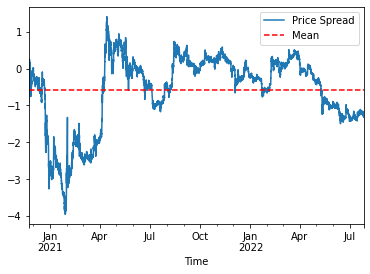

In [44]:
spread.plot() # Plot the spread
plt.axhline(spread.mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean'])

In [45]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

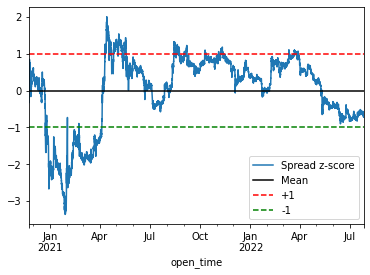

In [46]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1'])